In [36]:
import pandas as pd
import datetime
df=pd.read_csv('updated_leeds_centre2022.csv')
df.tail()

,Date,Time,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature
8507,12/21/2022,12:00:00,62.66498,3.74190,16.83000,22.56750,3.65874,0.116420,11.8,4.717,NaN,NaN,NaN
8508,12/21/2022,13:00:00,59.07272,4.86447,19.69875,27.15750,3.59222,0.232840,10.6,4.906,NaN,NaN,NaN
8509,12/21/2022,14:00:00,58.27444,4.61501,20.27250,27.34875,3.79178,0.232840,11.8,5.189,NaN,NaN,NaN
8510,12/21/2022,15:00:00,50.09207,5.48812,28.49625,36.91125,3.72526,0.116420,10.9,5.094,NaN,NaN,NaN
8511,12/21/2022,16:00:00,37.91830,6.48596,39.58875,49.53375,3.72526,0.221198,11.5,5.189,NaN,NaN,NaN


In [46]:
import pandas as pd
df=pd.read_csv("updated_leeds_centre2022.csv",header=None,na_values="?")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Date,Time,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature
1,1/1/2022,1:00:00,37.65221,4.17565,27.52143,33.924,0.8793,0.234986,23.525,17.594,200.4,3.5,9.6
2,1/1/2022,2:00:00,33.52776,1.90887,25.20075,28.12763,0.61551,0.208456,18.45,13.231,179.1,2.8,9.3
3,1/1/2022,3:00:00,30.28475,3.6686,23.93636,29.56147,1.05516,0.250146,15.5,11.509,182.9,3.6,9.6
4,1/1/2022,4:00:00,41.80991,1.99835,12.44882,15.51291,0.79137,0.190453,8.7,5.566,179.1,3.7,10.2


In [47]:
#summarize the numbers of rows with missing values for each column
for i in range(df.shape[1]):
    #count number of rows with missing values
    n_miss=df[[i]].isnull().sum()
    perc=n_miss/df.shape[0]*100
    print('>%d.Missing:%d(%.1f%%)'%(i,n_miss,perc))

>0.Missing:0(0.0%)
>1.Missing:0(0.0%)
>2.Missing:90(1.1%)
>3.Missing:203(2.4%)
>4.Missing:203(2.4%)
>5.Missing:200(2.3%)
>6.Missing:137(1.6%)
>7.Missing:392(4.6%)
>8.Missing:60(0.7%)
>9.Missing:59(0.7%)
>10.Missing:112(1.3%)
>11.Missing:112(1.3%)
>12.Missing:112(1.3%)


In [49]:
#KNN Imputation transform

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
#load dataset
df = pd.read_csv("updated_leeds_centre2022.csv",header=None,
                 na_values="?")
#split into input and output elements
data=df.values
ix=[i for i in range(2,data.shape[1]) if i!=13]
X, y =data[:, ix], data[:, 12]
X=np.delete(X, 0, 0)
#print(X)
#print( total missing)
print('Missing before KNN imputation: %d' % sum(pd.isna(X).flatten()))
#define imputer
imputer = KNNImputer()
#fit on the dataset
imputer.fit(X)
#transform the dataset
Xtrans = imputer.transform(X)
#print(Xtrans)
#print total missing
print('Missing after KNN Imputation:%d' % sum(pd.isna(Xtrans).flatten()))
np.savetxt("updated_leeds_center_air_quality_2022.csv", Xtrans, delimiter=",",
           header="O3,NO,NO2,NOXasNO2,SO2,CO,PM10,PM2.5,M_DIR,M_SPEED,M_TEMP")

Missing before KNN imputation: 1680
Missing after KNN Imputation:0


In [51]:
import pandas as pd
import datetime
df=pd.read_csv('updated_leeds_center_air_quality_2022.csv',parse_dates=['Date'])
df

,Date,Time,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,PM2.5,M_DIR,M_SPEED,M_TEMP
0,2022-01-01,1:00:00,37.7,4.18,27.5,33.9,0.879,0.235,23.5,17.60,200.0,3.50,9.6
1,2022-01-01,2:00:00,33.5,1.91,25.2,28.1,0.616,0.208,18.4,13.20,179.0,2.80,9.3
2,2022-01-01,3:00:00,30.3,3.67,23.9,29.6,1.060,0.250,15.5,11.50,183.0,3.60,9.6
3,2022-01-01,4:00:00,41.8,2.00,12.4,15.5,0.791,0.190,8.7,5.57,179.0,3.70,10.2
4,2022-01-01,5:00:00,30.3,1.73,19.2,21.9,0.725,0.205,11.3,7.50,200.0,4.30,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507,2022-12-21,12:00:00,62.7,3.74,16.8,22.6,3.660,0.116,11.8,4.72,233.0,4.78,10.8
8508,2022-12-21,13:00:00,59.1,4.86,19.7,27.2,3.590,0.233,10.6,4.91,229.0,3.92,14.6
8509,2022-12-21,14:00:00,58.3,4.62,20.3,27.3,3.790,0.233,11.8,5.19,255.0,4.24,12.0
8510,2022-12-21,15:00:00,50.1,5.49,28.5,36.9,3.730,0.116,10.9,5.09,229.0,3.92,14.6


**Level 1 ANALYSIS**


**RO1.1**

In [50]:
import pandas as pd
import datetime
df=pd.read_csv('updated_leeds_center_air_quality_2022.csv',parse_dates=['Date'])
df.describe()

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,PM2.5,M_DIR,M_SPEED,M_TEMP
count,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000
mean,47.015913,6.450694,22.105578,31.983048,1.049914,0.199802,14.812935,8.650420,210.780369,3.515437,9.618280
std,23.445942,12.987400,14.147374,30.726919,0.782871,0.134587,12.589434,8.946348,93.628137,1.791205,5.867955
min,0.000000,-0.605000,1.940000,-0.492000,-0.263000,0.000000,0.475000,0.307000,0.200000,0.000000,-6.400000
25%,31.500000,1.470000,11.900000,15.300000,0.656000,0.104000,7.465000,3.700000,156.000000,2.300000,5.600000
50%,48.600000,3.330000,18.200000,23.700000,0.919000,0.151000,11.600000,5.970000,234.000000,3.200000,9.300000
75%,62.500000,6.190000,29.200000,37.900000,1.240000,0.261000,17.900000,10.000000,286.000000,4.500000,13.600000
max,169.000000,234.000000,121.000000,439.000000,16.000000,1.060000,180.000000,123.000000,360.000000,14.800000,31.000000


**RO1.2**

Text(0, 0.5, 'Units in ug/m3')

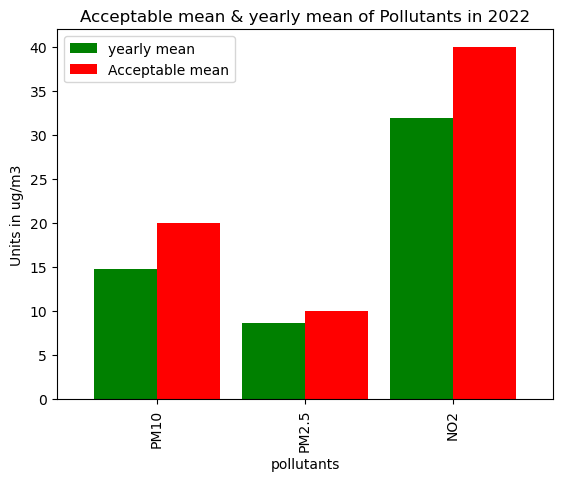

In [55]:
#yearly mean of Pollutants
import matplotlib.pyplot as plt
year_wise = df.groupby(pd.Grouper(key='Date',freq='Y')).mean()
yearly_mean = [year_wise.iloc[0]['PM10'],year_wise.iloc[0]['PM2.5'],year_wise.iloc[0]['NOXasNO2']]
std_mean=[20,10,40]
index = ['PM10','PM2.5','NO2']

df1 = pd.DataFrame({'yearly mean': yearly_mean, 'Acceptable mean': std_mean},index=index)
ax = df1.plot.bar(color = ("g","r"),width=0.85, rot=90)

#set title
ax.set_title('Acceptable mean & yearly mean of Pollutants in 2022')

#set the x-axis label
ax.set_xlabel("pollutants")

#set the y-axis label
ax.set_ylabel("Units in ug/m3")

**RO 1.3**

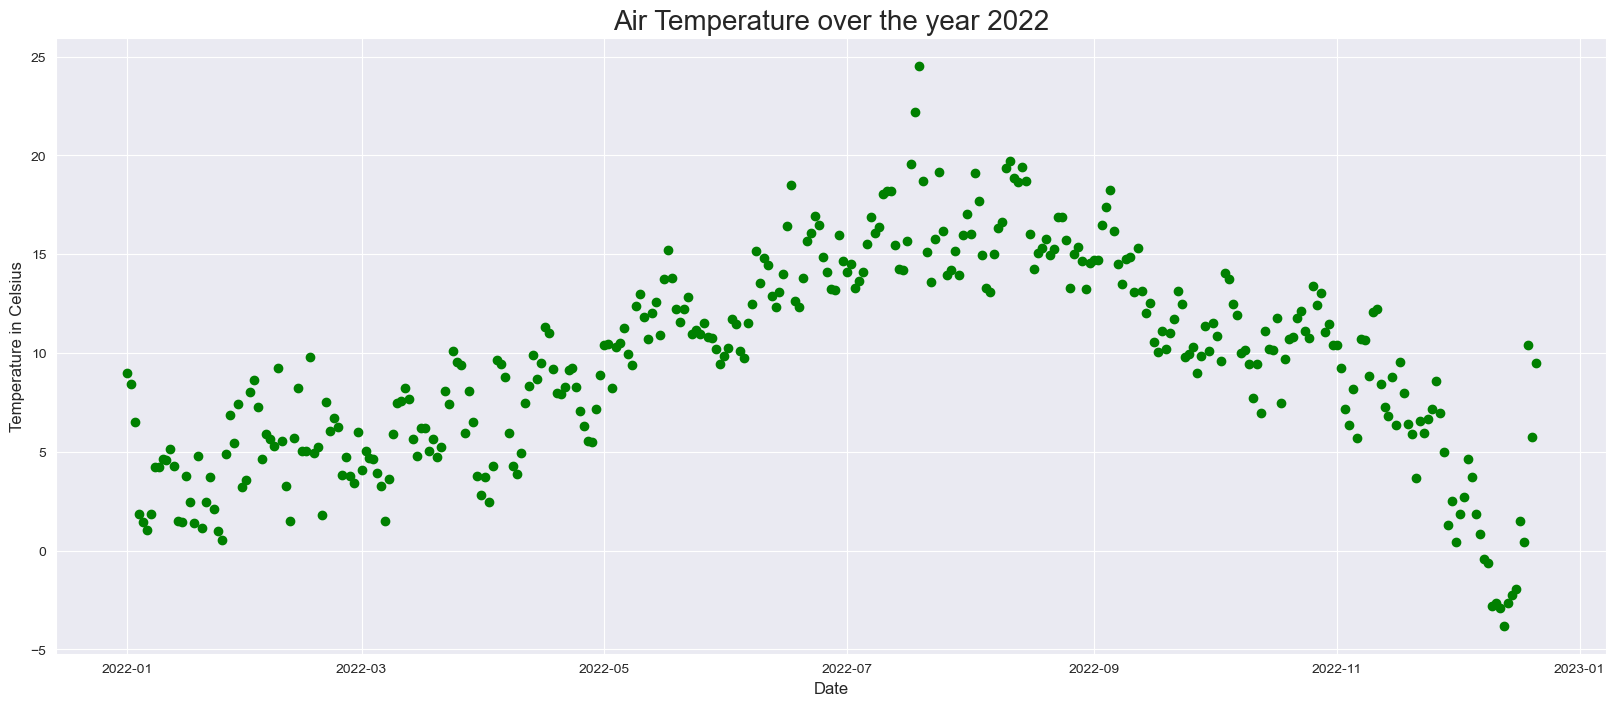

In [52]:
# daily temperature mean
import matplotlib.pyplot as plt
#df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
day_wise = df.groupby('Date').mean()
days=pd.date_range("1/1/2022",periods=355)
day_wise.columns
temp=day_wise[['M_TEMP']]
plt.figure(figsize=(20,8))
plt.scatter(days,temp,color='green', marker='o')
plt.title("Air Temperature over the year 2022",fontsize =20)
plt.xlabel("Date",fontsize = 12)
plt.ylabel("Temperature in Celsius",fontsize = 12)
plt.show()


**ROI1.4**

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib

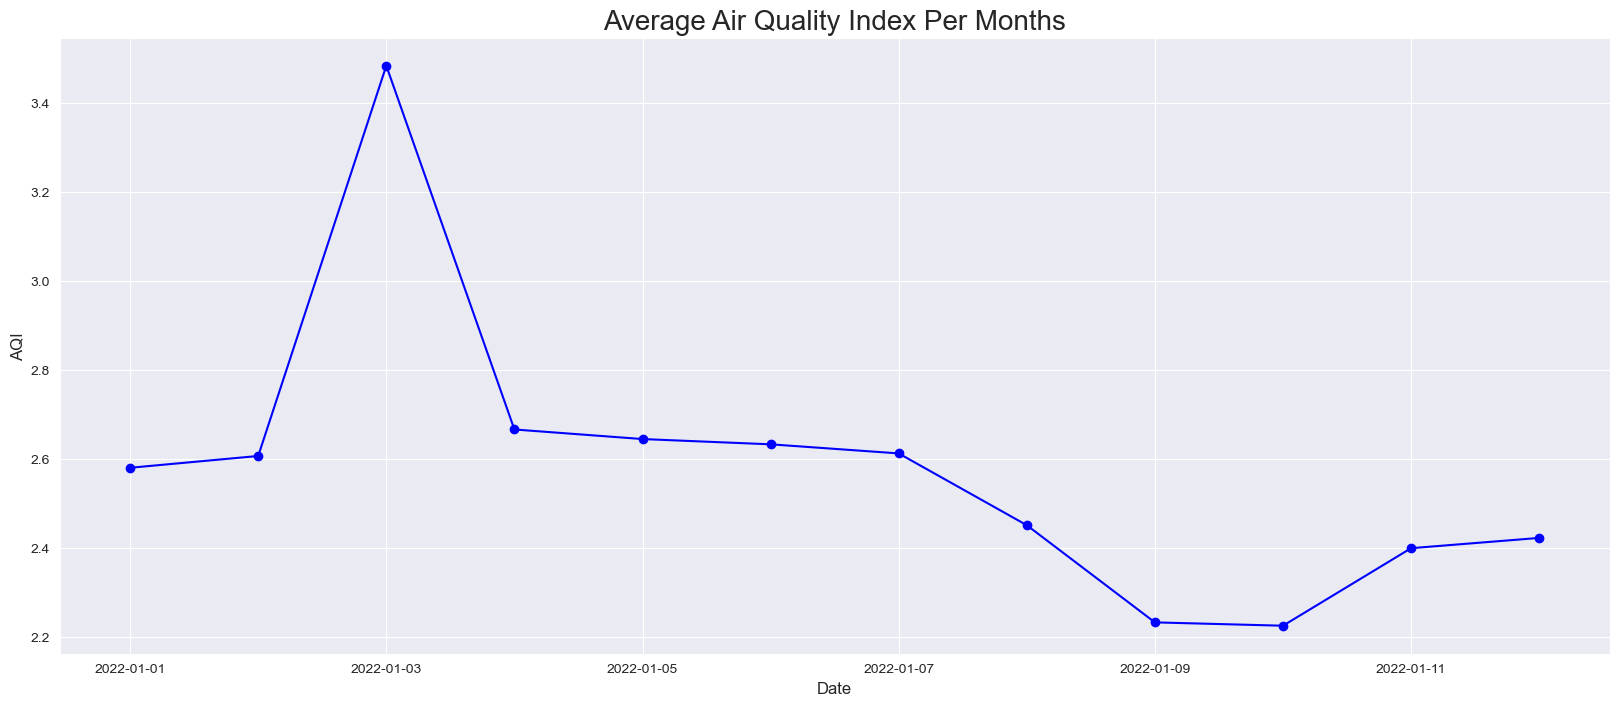

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("index202212272337.csv", parse_dates=['Date'])
months = pd.date_range("1/2022", periods=12)
month_wise = df.groupby(pd.Grouper(key='Date', freq='M')).mean()
plt.figure(figsize=(20, 8))
plt.plot(months, month_wise[['AQI']], color='blue', marker='o')
plt.title("Average Air Quality Index Per Months", fontsize=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("AQI", fontsize=12)
plt.show()
